Diagnosis bizim tahmin etmek istediğimiz sütun.

M = malignant(kötü huylu) = 0 
B = benign(iyi huylu) = 1 

Makine öğrenmesi modelleri ikiye ayrılır Regresyonlar ve Classificationlar. Regresyonlar aralık verir, Classification (sınıflandırma) da ise bize net bir şey verir.

Veri seti 569 satır ve 32 sütun içeriyor. 
'Diagnosis' kısmı kanserin M = kötü huylu mu yoksa B = iyi huylu mu olduğunu söyleyen, tahminin yapılacağı sütundur. 

1, kanserin kötü huylu olduğu, 0 ise iyi huylu olduğu anlamına gelir. 
569 kişiden 357'sinin B (iyi huylu) ve 212'sinin M (kötü huylu) olarak etiketlendiğini tespit edebiliriz.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Veri setini yükleme
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", 
                "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave Points",
                "Mean Symmetry", "Mean Fractal Dimension", "SE Radius", "SE Texture", "SE Perimeter",
                "SE Area", "SE Smoothness", "SE Compactness", "SE Concavity", "SE Concave Points",
                "SE Symmetry", "SE Fractal Dimension", "Worst Radius", "Worst Texture", "Worst Perimeter",
                "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity",
                "Worst Concave Points", "Worst Symmetry", "Worst Fractal Dimension"]
data = pd.read_csv(url, names=column_names)

# İlk sütun "ID" olduğu için 2. sütundan (indeks 1) başlayarak son sütuna (indeks 30) kadar olan sütunları seçiyoruz.
data = pd.read_csv(url, usecols=range(1, 32), names=column_names)


#shape ile veri setinin boyutları hakkında bilgi edinebiliriz-> Veri seti 569 satır ve 32 sütun içeriyor.(569, 32)
print("Cancer data set dimensions : {}".format(data.shape))

#Diagnosis sütununun dağılımını görüntüler ->B:357 ve M: 212
print("Distribution of data: ", data['Diagnosis'].value_counts()) 


'''
1, kanserin kötü huylu olduğu, 0 ise iyi huylu olduğu anlamına gelir. 
569 kişiden 357'si B (iyi huylu) ve
212 M (kötü huylu) olarak etiketlendiğini tespit edebiliriz.

'''

print(data)


Cancer data set dimensions : (569, 31)
Distribution of data:  B    357
M    212
Name: Diagnosis, dtype: int64
    Diagnosis  Mean Radius  Mean Texture  Mean Perimeter  Mean Area  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     Mean Smoothness  Mean Compactnes

In [5]:
# Kullanılan Kütüphane
from sklearn.preprocessing import OneHotEncoder

# metinsen veriyi (B ve M) int hale getirir (0 ve 1)

# Sınıf etiketlerini One-Hot Encoding ile dönüştürme
y = data["Diagnosis"].values 
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(y.reshape(-1, 1)).toarray()

In [7]:
# Kullanılan Kütüphane
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setlerine bölelim
X = data.iloc[:, 2:32].values #2.sütundan (indeks 1) başlayarak 32. sütuna (indeks 31) kadar olan sütunları seçiyor.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (455, 30)
Shape of testing data is:  (114, 30)


In [8]:
# Kullanılan Kütüphane
from sklearn.preprocessing import StandardScaler

# Veriyi ölçeklendirme (StandardScaler kullanarak)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X)  #Scaled values

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [12]:
# Meme kanseri sınıflandırma modelinin tasarımı

# Kullanılan Kütüphaneler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='BreastCancer')

model.add(Dense(64, activation='relu', input_dim=X_train.shape[1], name='Hidden-1'))
model.add(Dense(64, activation='relu', name='Hidden-2'))
model.add(Dense(2, activation='softmax', name='Output')) # Meme kanseri için 2 sınıf (Malignant ve Benign)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, Y_train, batch_size=32, epochs=200, validation_split=0.2)


Model: "BreastCancer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 64)                1984      
                                                                 
 Hidden-2 (Dense)            (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 2)                 130       
                                                                 
Total params: 6274 (24.51 KB)
Trainable params: 6274 (24.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
12/12 [==============================] - 1s 14ms/step - loss: 0.5040 - accuracy: 0.7967 - val_loss: 0.3176 - val_accuracy: 0.9011
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 0.2200 - accuracy: 0.9505 - val_loss: 0.1752 - val_accuracy: 0.9670
E

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=10)

Epoch 1/100
46/46 [==============================] - 1s 1ms/step - loss: 0.4605 - accuracy: 0.7692
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: 0.2334 - accuracy: 0.9319
Epoch 3/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1591 - accuracy: 0.9538
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.9670
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1064 - accuracy: 0.9670
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9714
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0827 - accuracy: 0.9736
Epoch 8/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.9780
Epoch 9/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0689 - accuracy: 0.9802
Epoch 10/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9802
Epoch 11/

In [11]:
# Test verileri üzerinde modeli değerlendirme
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9649
Test Loss: 0.14586123824119568
Test Accuracy: 0.9649122953414917


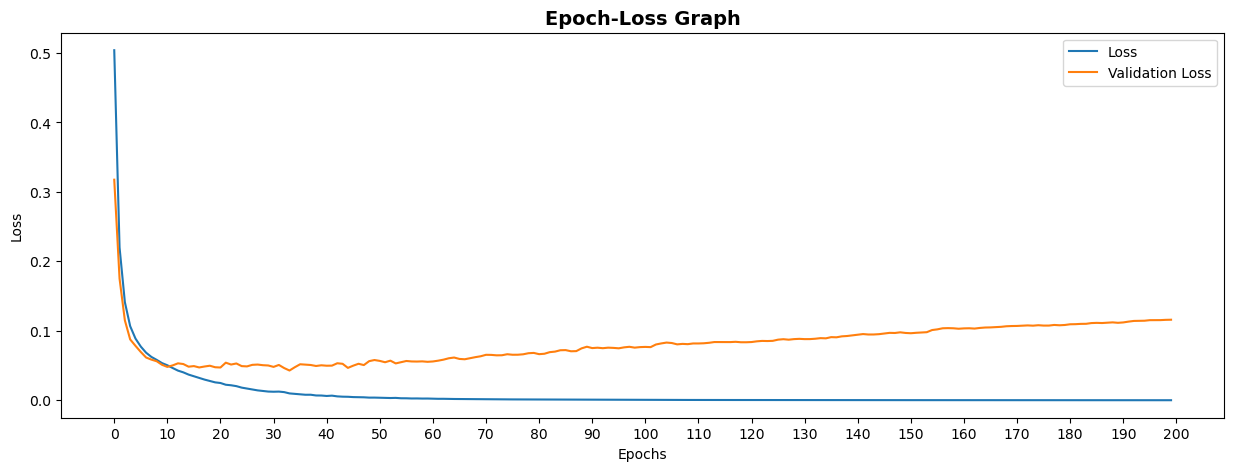

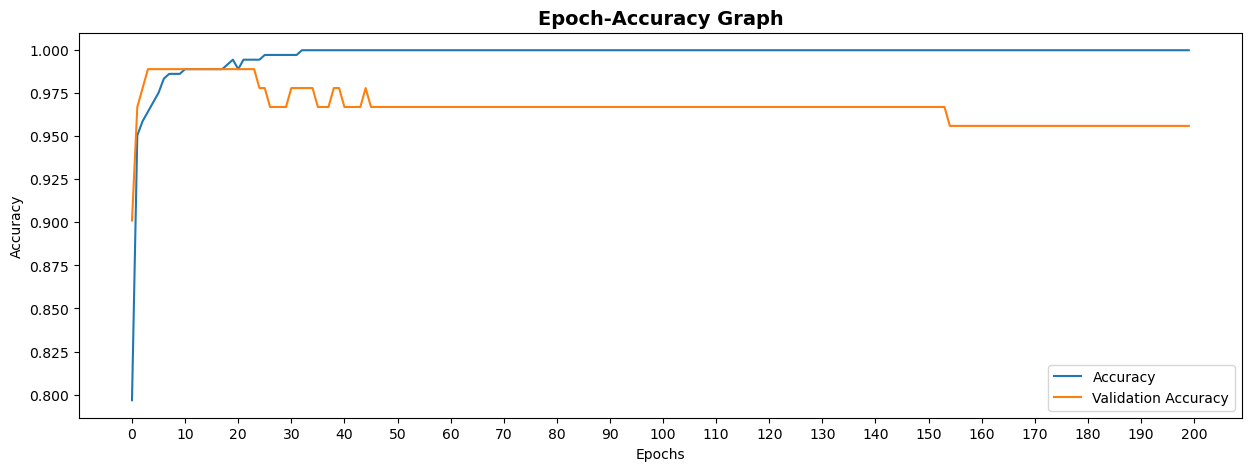

In [13]:
# Loss ve doğruluk grafiği çizimi

# Kullanılan Kütüphane
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.title('Epoch-Loss Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0, 210, 10))

plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])

plt.show()

plt.figure(figsize=(15, 5))
plt.title('Epoch-Accuracy Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0, 210, 10))

plt.plot(hist.epoch, hist.history['accuracy'])
plt.plot(hist.epoch, hist.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()


In [24]:
# Modeli kaydetme

#model.save('breast_cancer.h5', save_format='h5')
model.save('my_model.keras') #burada model bu şekilde kaydediliyormuş

# Tahminler yapma
from tensorflow.keras.models import load_model

#model = load_model('breast_cancer.h5')

model = load_model('my_model.keras') 


# Örnek verileri tahmin etme
predict_data = np.array([[17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                          1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003,
                          0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601,
                          0.1189]])

# Örnek verileri ölçeklendirme
transformed_predict_data = sc.transform(predict_data)

# Tahmin yapma
predict_result = model.predict(transformed_predict_data)


# Tahmin sonuçlarını yazdırma
for i in range(len(predict_result)):
    if predict_result[i, 1] > 0.5:
        print('Malignant (Kötü Huylu)')
    else:
        print('Benign (İyi Huylu)')
        

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                496       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 2)                 18        
                                                                 
Total params: 650 (2.54 KB)
Trainable params: 650 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 49ms/step
Malignant (Kötü Huylu)
